In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



Загружаем данные, очищая их и переводя индекс в формат дата-время

In [2]:
df = pd.read_csv('crime.csv.zip')
df.head()

,Unnamed: 0,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,2010-07-01 00:10,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,2010-07-01 00:11,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2,2010-07-01 00:35,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
3,2010-07-01 00:44,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
4,2010-07-01 01:10,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08


In [3]:
df = df[df['Unnamed: 0'].str.len() == 16]

In [4]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
df = df.set_index('Unnamed: 0')
df.head()

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08


#### Построим сводную таблицу по клоличеству правонарушений в зависимости от рассы и пола

In [5]:
crimes_table = df.pivot_table(index = 'driver_race', columns = 'driver_gender', aggfunc = 'size')
crimes_table

driver_gender,F,M
driver_race,,
Asian,1022,2424
Black,1339,4232
Hispanic,579,1983
Other,75,188
White,96096,165243


#### Построим сводную таблицу по долям правонарушений в зависимости от рассы и пола внутри рассы

In [6]:
crimes_table.div(crimes_table.sum(axis = 1), axis = 0)

driver_gender,F,M
driver_race,,
Asian,0.296576,0.703424
Black,0.240352,0.759648
Hispanic,0.225995,0.774005
Other,0.285171,0.714829
White,0.367706,0.632294


#### Найдем ежемесячное количество преступлений.

In [7]:
df.id.resample('M').count()

Unnamed: 0
2010-07-31    4281
2010-08-31    3429
2010-09-30    3751
2010-10-31    3644
2010-11-30    4430
              ... 
2015-08-31    3521
2015-09-30    3260
2015-10-31    3192
2015-11-30    3019
2015-12-31    2096
Freq: M, Name: id, Length: 66, dtype: int64

#### Найдем ежедневное количество водителей с опьянением `DUI` (см. столбец: `violation` ), затем посмотроим среднее количество пьяных по дням недели. Найдем 'самый пьяный день'.

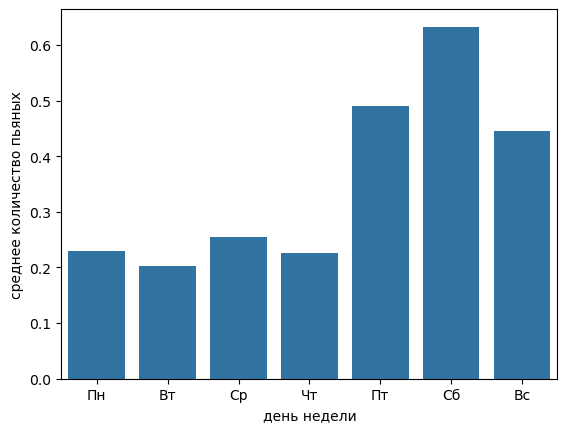

In [8]:
everyday_drunk = df.violation[df.violation == 'DUI'].resample('D').count()
temp1 = pd.DataFrame(everyday_drunk)
temp1['day_of_week'] = temp1.index.dayofweek
temp2 = temp1.groupby('day_of_week').mean()
dict = {0:'Пн', 1:'Вт', 2:'Ср', 3:'Чт', 4: 'Пт', 5: 'Сб', 6:'Вс'}
temp3 = temp2.rename(index = dict)
ax = sns.barplot(x = temp3.index, y = temp3.violation)
ax.set(xlabel='день недели', ylabel='среднее количество пьяных');

Как видно из диаграммы, в пятницу, субботу и воскресенье количество пьяных людей существенно больше, чем в другие дни на неделе.  
Самый пьяный день - суббота.

#### Попробуем обнаружить внутригодовую цикличность по нарушению оборудования автомобиля 

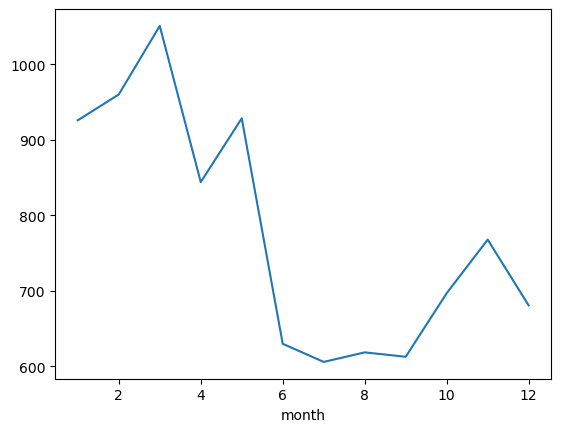

In [9]:
equip1 = pd.DataFrame(df.id[df.violation == 'Equipment'].resample('M').count())
equip1['month'] = equip1.index.month
equip1.groupby('month').id.mean().plot();

Мы видим, что по всем годам в среднем наступает пик в районе марта, второй пик в районе мая и третий пик в районе ноября. Цикличность есть

#### Найдем 'самый пьяный час' по пятницам, субботам и воскресеньям.

<Axes: xlabel='hour', ylabel='violation'>

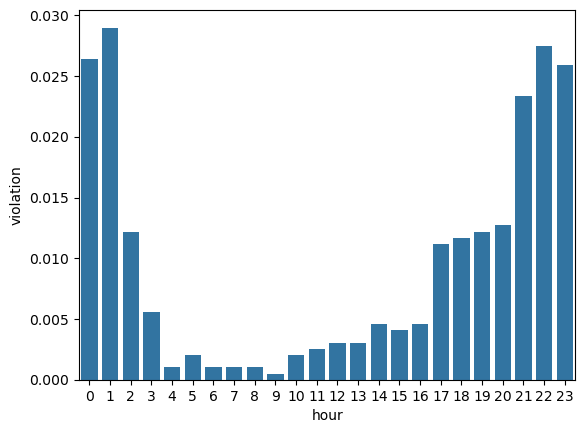

In [10]:
df['day_of_week'] = df.index.dayofweek
vihi = df[df['day_of_week'].isin([4, 5, 6])]
drunk_hour = pd.DataFrame(vihi[vihi.violation == 'DUI'].violation.resample('H').count())
drunk_hour['hour'] = drunk_hour.index.hour
hours = drunk_hour.groupby('hour').violation.mean()
sns.barplot(x = hours.index, y = hours)

In [11]:
hours.nlargest(1) 

hour
1    0.028978
Name: violation, dtype: float64

Как видно из кода и из графика, самый пьяный час - час ночи. Среднее количество задержанных: 0.028978

#### Попробуем обнаружить, существует ли округа со значительным количеством правонарушениями по рассовому признаку?

In [12]:
df.groupby(['county_name', 'driver_race']).size()

county_name     driver_race
Addison County  Asian            217
                Black            333
                Hispanic         178
                Other             20
                White          22065
                               ...  
Windsor County  Asian            657
                Black            974
                Hispanic         376
                Other             26
                White          34431
Length: 69, dtype: int64

In [13]:
race_county_data = df[['county_name', 'driver_race']]
race_county_data = race_county_data.dropna()

county_race_counts = race_county_data.groupby(['county_name', 'driver_race']).size().reset_index(name='counts')

county_total_counts = race_county_data.groupby('county_name').size().reset_index(name='total_counts')

county_race_proportions = pd.merge(county_race_counts, county_total_counts, on='county_name')
county_race_proportions['proportion'] = county_race_proportions['counts'] / county_race_proportions['total_counts']
display(county_race_proportions.query('proportion>0.5'))
display(county_race_proportions)

,county_name,driver_race,counts,total_counts,proportion
4,Addison County,White,22065,22813,0.967212
9,Bennington County,White,21495,22250,0.966067
14,Caledonia County,White,16055,16505,0.972736
19,Chittenden County,White,23488,24815,0.946524
24,Essex County,White,1222,1239,0.986279
29,Franklin County,White,19148,19715,0.971240
33,Grand Isle County,White,507,520,0.975000
38,Lamoille County,White,8446,8604,0.981636
43,Orange County,White,23651,24679,0.958345
48,Orleans County,White,10154,10344,0.981632


,county_name,driver_race,counts,total_counts,proportion
0,Addison County,Asian,217,22813,0.009512
1,Addison County,Black,333,22813,0.014597
2,Addison County,Hispanic,178,22813,0.007803
3,Addison County,Other,20,22813,0.000877
4,Addison County,White,22065,22813,0.967212
...,...,...,...,...,...
64,Windsor County,Asian,657,36464,0.018018
65,Windsor County,Black,974,36464,0.026711
66,Windsor County,Hispanic,376,36464,0.010312
67,Windsor County,Other,26,36464,0.000713


Мы видим, что во всех округах 95% всех преступлений совершают белые (в пункте 2 видно, что белых - абсолютное большинство). Можно сделать вывод, что нет ярковыраженного притеснения не белых слоев населения. Нету правонарушений по расовому признаку.